In [28]:
import pyupbit
import pybithumb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
# volatality breakout > returns target price
def vb(df,k):
    df_vb = df.copy()
    df_vb['range'] = (df_vb['high'] - df_vb['low'])*k
    df_vb['range_s1'] = df_vb['range'].shift(1) # s1 is shift1
    df_vb['target'] = df_vb['open'] + df_vb['range_s1']
    # print(df_vb.tail())
    return df_vb['target']

# mean average 5 (is_bull when opening price > ma5)
def ma5(df):
    df_ma5 = df.copy()
    df_ma5['ma5'] = df_ma5['close'].rolling(5).mean()
    df_ma5['ma5_s1'] = df_ma5['ma5'].shift(1)
    df_ma5['is_bull'] = np.where(df_ma5['open']>df_ma5['ma5_s1'],1,0)
    # print(df_ma5)
    return df_ma5['is_bull']

def eva(df,name='Base'):
    df_eva = pd.DataFrame(df.values,index=df.index,columns=['ror'])
    df_eva['hpr'] = df_eva['ror'].cumprod()
    df_eva['dd'] = (df_eva['hpr'].cummax() - df_eva['hpr']) / df_eva['hpr'].cummax() * 100
    # print(df_eva)
    print(name,"HPR: ",df_eva['hpr'][-2], " MDD(%): ", df_eva['dd'].max())
    return
    

In [45]:
df = pybithumb.get_ohlcv("BTC")

# df = df.loc['']

df['target'] = vb(df, 0.5)
df['is_bull'] = ma5(df)

fee = 0.99700225
df['ror_1'] = np.where(df['high']>df['target'],
                       df['close']/df['target']*fee,
                       1)
df['ror_2'] = np.where((df['high']>df['target']) & df['is_bull'],
                       df['close']/df['target']*fee,
                       1)


eva(df['ror_1'])
eva(df['ror_2'],'+ma5')

Base HPR:  2.2594250599618966  MDD(%):  73.56674708971049
+ma5 HPR:  18.588469724350695  MDD(%):  38.012383354958615


# Volatality Breakout BackTest
using upbit data 21-6-22~22-1-7 (200days)

w/o fee & slippage 1.1

w/ fee & slippage 0.8

93 transactions made but ony 39 Earns (54 lose)


In [73]:
fee = 0.99700225

df = pybithumb.get_ohlcv("BTC")
#print(df)

df=df['2021']

df['diff'] = (df['high']-df['low'])*0.5
df['diff_shift1'] = df['diff'].shift(1)
df['target'] = df['open']+df['diff_shift1']

df['profit'] = np.where(df['high']>df['target'],df['close']/df['target']*fee,1)
profit = df['profit'].cumprod()[-2]

print('profit: ',profit)
print('# Transactions: ',len(df[df.profit!=1]),'\n# Earn: ',len(df[df.profit>1]),'\n# Lose: ',len(df[df.profit<1]))
# df[['open','close','high','target','profit']]
# print(df[df.profit>1].profit.cumprod()[-1])

profit:  1.5803207002955382
# Transactions:  146 
# Earn:  72 
# Lose:  74


/home/ec2-user/CoinTrader/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


# ma5 + volatality breakout
volatality breakout의 조건을 만족할 때 5일 이동평균을 이용하여 상승장일때만 투자

profit:  0.7438699512742706 0.909273710953337
# Transactions:  114 
# Earn:  40 
# Lose:  74
# Transactions:  97 
# Earn:  36 
# Lose:  61


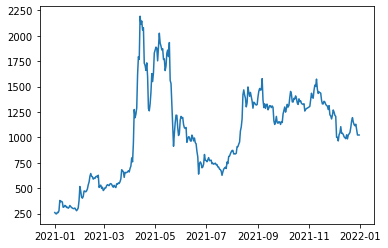

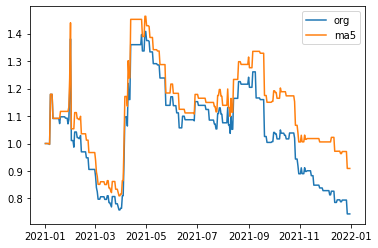

In [64]:


fee = 0.99700225

df = pybithumb.get_ohlcv('XRP')
df = df.loc['2021']
# print(df)

# Volatality Breakout
df['diff'] = (df['high']-df['low'])*0.7
df['diff_shift1'] = df['diff'].shift(1)
df['target'] = df['open']+df['diff_shift1']

# Mean Average 5
df['ma5'] = df['close'].rolling(5).mean()
df['ma5_shift1'] = df['ma5'].shift(1)
#df[['close','ma5','ma5_shift1']]

# Make Transaction w/ MA5
df['profit_2'] = np.where((df['high']>df['target']) & (df['target']>df['ma5_shift1']),df['close']/df['target']*fee,1)
profit_2 = df['profit_2'].cumprod()[-2]
# Make Transaction w/o MA5
df['profit_1'] = np.where(df['high']>df['target'],df['close']/df['target']*fee,1)
profit_1 = df['profit_1'].cumprod()[-2]


print('profit: ',profit_1,profit_2)
print('# Transactions: ',len(df[df.profit_1!=1]),'\n# Earn: ',len(df[df.profit_1>1]),'\n# Lose: ',len(df[df.profit_1<1]))
print('# Transactions: ',len(df[df.profit_2!=1]),'\n# Earn: ',len(df[df.profit_2>1]),'\n# Lose: ',len(df[df.profit_2<1]))

plt.plot(df['close'])
plt.show()
plt.plot(df.index,df['profit_1'].cumprod(),df['profit_2'].cumprod())
plt.legend(['org','ma5'])
plt.show()

# Support functions

In [17]:
def select_range(start,end,df):
    return df[start:end]

In [45]:
lose_avg = np.where(df.profit_1<1,df.profit_1,'NaN')

TypeError: cannot perform reduce with flexible type

https://blog.naver.com/niolpa/222436997945

https://blog.naver.com/tomorrowstock/222267270562